In [1]:
#Import all packages
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
import statistics
from scipy import stats

import sklearn
from sklearn import  preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
#Load the data set into Pandas
df = pd.read_csv('churn_clean.csv', index_col = 0)
df.describe()

,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,...,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [3]:
#Drop the less meaningul columns from the data set
df = df.drop(columns = ['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Gender',
                        'Population', 'Area', 'TimeZone', 'Job', 'Marital', 'Email', 'Contacts', 'Techie', 'TechSupport',
                        'PaperlessBilling', 'PaymentMethod', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'])

In [4]:
#Search for missing data
df.isnull().sum()

Children                0
Age                     0
Income                  0
Churn                   0
Outage_sec_perweek      0
Yearly_equip_failure    0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
StreamingTV             0
StreamingMovies         0
Tenure                  0
MonthlyCharge           0
Bandwidth_GB_Year       0
dtype: int64

In [5]:
#No missing data, now to use ordinal encoding to replace the categorical values with numeric ones
#Yes to 1, No to 0
df['Churn_num'] = df['Churn']
df['Tablet_num'] = df['Tablet']
df['Phone_num'] = df['Phone']
df['Multiple_num'] = df['Multiple']
df['OnlineSecurity_num'] = df['OnlineSecurity']
df['OnlineBackup_num'] = df['OnlineBackup']
df['DeviceProtection_num'] = df['DeviceProtection']
df['StreamingTV_num'] = df['StreamingTV']
df['StreamingMovies_num'] = df['StreamingMovies']
df['Port_modem_num'] = df['Port_modem']

In [6]:
#Set up dictionary for converting to numeric values
dict_churn = {"Churn_num" : {"Yes" : 1, "No" : 0}}
dict_tablet = {"Tablet_num" : {"Yes" : 1, "No" : 0}}
dict_phone = {"Phone_num" : {"Yes" : 1, "No" : 0}}
dict_multiple = {"Multiple_num" : {"Yes" : 1, "No" : 0}}
dict_security = {"OnlineSecurity_num" : {"Yes" : 1, "No" : 0}}
dict_backup = {"OnlineBackup_num" : {"Yes" : 1, "No" : 0}}
dict_protection = {"DeviceProtection_num" : {"Yes" : 1, "No" : 0}}
dict_tv = {"StreamingTV_num" : {"Yes" : 1, "No" : 0}}
dict_movies = {"StreamingMovies_num" : {"Yes" : 1, "No" : 0}}
dict_modem = {"Port_modem_num" : {"Yes" : 1, "No" : 0}}

In [7]:
#Replace the variables values
df.replace(dict_churn, inplace = True)
df.replace(dict_tablet, inplace = True)
df.replace(dict_phone, inplace = True)
df.replace(dict_multiple, inplace = True)
df.replace(dict_security, inplace = True)
df.replace(dict_backup, inplace = True)
df.replace(dict_protection, inplace = True)
df.replace(dict_tv, inplace = True)
df.replace(dict_movies, inplace = True)
df.replace(dict_modem, inplace = True)

In [8]:
#Now that we have those as numeric, we can drop the original columns
df = df.drop(columns = ['Churn', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity','OnlineBackup', 'DeviceProtection','StreamingTV', 'StreamingMovies'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Children              10000 non-null  int64  
 1   Age                   10000 non-null  int64  
 2   Income                10000 non-null  float64
 3   Outage_sec_perweek    10000 non-null  float64
 4   Yearly_equip_failure  10000 non-null  int64  
 5   Contract              10000 non-null  object 
 6   InternetService       10000 non-null  object 
 7   Tenure                10000 non-null  float64
 8   MonthlyCharge         10000 non-null  float64
 9   Bandwidth_GB_Year     10000 non-null  float64
 10  Churn_num             10000 non-null  int64  
 11  Tablet_num            10000 non-null  int64  
 12  Phone_num             10000 non-null  int64  
 13  Multiple_num          10000 non-null  int64  
 14  OnlineSecurity_num    10000 non-null  int64  
 15  OnlineBackup_num   

In [9]:
#Now we use dummies and one-hot encoding for the categorical variables with n-levels
contract = pd.get_dummies(df['Contract'], drop_first = True)
internet = pd.get_dummies(df['InternetService'], drop_first = True)
df = df.join(contract)
df = df.join(internet)
#df.info()

In [10]:
#Drop the original columns
df = df.drop(columns = ['Contract', 'InternetService'])

In [11]:
#Move MonthlyCharge to top of the data set
df = df.set_index('MonthlyCharge').reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MonthlyCharge         10000 non-null  float64
 1   Children              10000 non-null  int64  
 2   Age                   10000 non-null  int64  
 3   Income                10000 non-null  float64
 4   Outage_sec_perweek    10000 non-null  float64
 5   Yearly_equip_failure  10000 non-null  int64  
 6   Tenure                10000 non-null  float64
 7   Bandwidth_GB_Year     10000 non-null  float64
 8   Churn_num             10000 non-null  int64  
 9   Tablet_num            10000 non-null  int64  
 10  Phone_num             10000 non-null  int64  
 11  Multiple_num          10000 non-null  int64  
 12  OnlineSecurity_num    10000 non-null  int64  
 13  OnlineBackup_num      10000 non-null  int64  
 14  DeviceProtection_num  10000 non-null  int64  
 15  StreamingTV_num     

array([[<AxesSubplot:title={'center':'Children'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Outage_sec_perweek'}>,
        <AxesSubplot:title={'center':'Yearly_equip_failure'}>,
        <AxesSubplot:title={'center':'Tenure'}>],
       [<AxesSubplot:title={'center':'Bandwidth_GB_Year'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

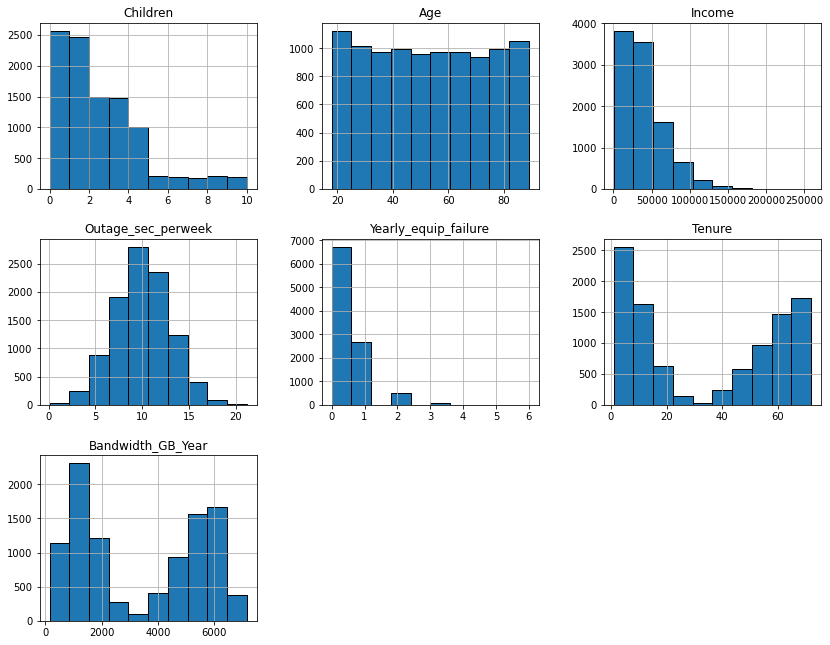

In [12]:
#For univariate statistics, create histograms for the continuous and categorical variables
df[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Yearly_equip_failure', 'Tenure', 'Bandwidth_GB_Year']].hist(ec = "black", figsize = (14, 11))
#plt.savefig('Histogram1.jpg')

<AxesSubplot:xlabel='Children'>

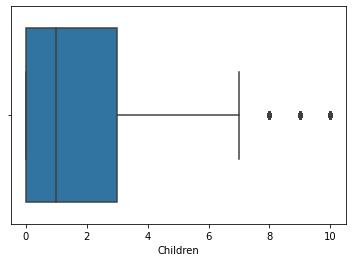

In [13]:
#Create a couple boxplots
sns.boxplot(x = df["Children"])
#plt.savefig('BPChild.jpg')

<AxesSubplot:xlabel='Age'>

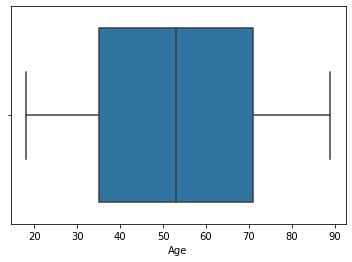

In [14]:
sns.boxplot(x = df["Age"])
#plt.savefig('BPAge.jpg')

<AxesSubplot:xlabel='Tenure'>

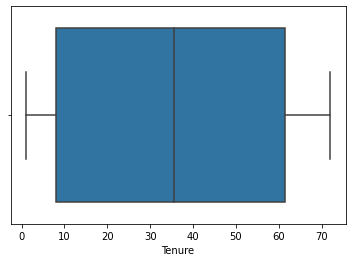

In [15]:
sns.boxplot(x = df["Tenure"])
#plt.savefig('BPTenure.jpg')

<AxesSubplot:xlabel='Bandwidth_GB_Year'>

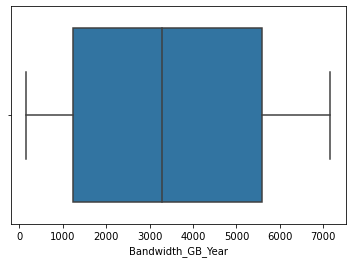

In [16]:
sns.boxplot(x = df["Bandwidth_GB_Year"])
#plt.savefig('BPBandwidth.jpg')

In [17]:
#For bivariate statistics create some scatterplots with a few variables with our response variable as the y-axis
#First, creating a random sampling of 25% of the data set for the scatterplots to improve visibility[3]
subset = df.sample(frac = 0.25)

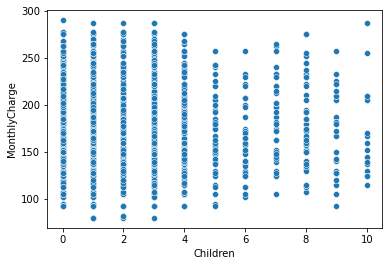

In [18]:
sns.scatterplot(data = subset, x = "Children", y = "MonthlyCharge")
#plt.savefig('Children.jpg')
plt.show()

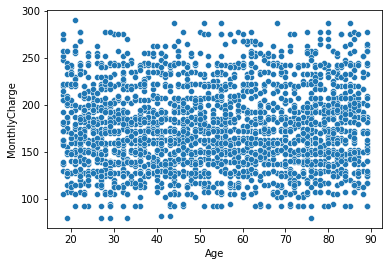

In [19]:
sns.scatterplot(data = subset, x = "Age", y = "MonthlyCharge")
#plt.savefig('Age.jpg')
plt.show()

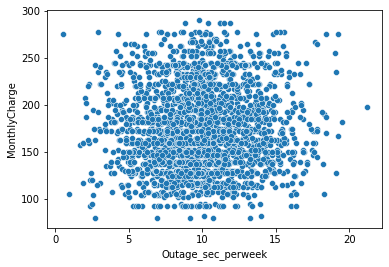

In [20]:
sns.scatterplot(data = subset, x = "Outage_sec_perweek", y = "MonthlyCharge")
#plt.savefig('Outage.jpg')
plt.show()

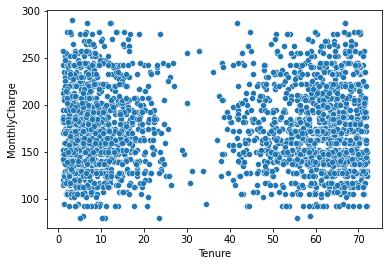

In [21]:
sns.scatterplot(data = subset, x = "Tenure", y = "MonthlyCharge")
#plt.savefig('Tenure.jpg')
plt.show()

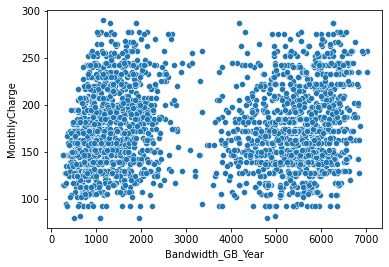

In [22]:
sns.scatterplot(data = subset, x = "Bandwidth_GB_Year", y = "MonthlyCharge")
#plt.savefig('Bandwidth.jpg')
plt.show()

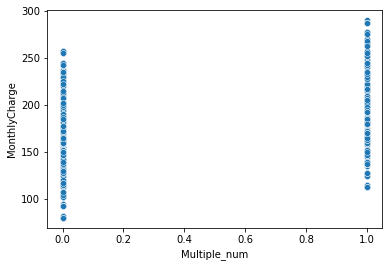

In [23]:
sns.scatterplot(data = subset, x = "Multiple_num", y = "MonthlyCharge")
#plt.savefig('Multiple.jpg')
plt.show()

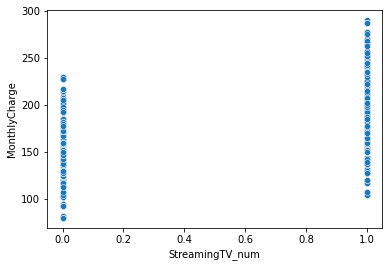

In [24]:
sns.scatterplot(data = subset, x = "StreamingTV_num", y = "MonthlyCharge")
#plt.savefig('TV.jpg')
plt.show()

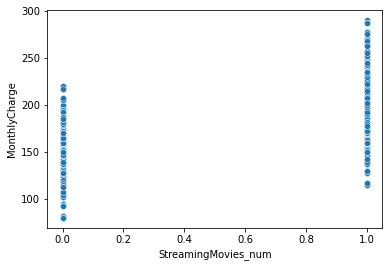

In [25]:
sns.scatterplot(data = subset, x = "StreamingMovies_num", y = "MonthlyCharge")
#plt.savefig('Movie.jpg')
plt.show()

In [26]:
#Extract prepared dataset
df.to_csv('churn_prepared.csv')